# Homework 2
## OPER 679 - Empirical Modeling
###  MAJ Matthew Ferguson
This document produced using a jupyter notebook.
The version of the notebook server is 4.1.0-354a863 and is running on:

Python 2.7.11 |Anaconda 2.4.1 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

Current Kernel Information:

R version 3.2.2 (2015-08-14)using an R kernel, R version 3.2.2 (2015-08-14).


#### Textbook Problem 4.1
Consider the simple regression model fit to the National Football League team performance data in Problem 2.1

In [3]:
A <- read.csv("HW-2Sp-16.csv", strip.white = TRUE, header=TRUE, sep = ",")
head(A)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
1,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
2,11,2003,2855,38.8,61.3,3,615,55,2096,1575
3,11,2957,1737,40.1,60,14,914,65.6,1847,2175
4,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
5,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866
6,11,2309,2927,39.7,74.1,8,786,61,1848,2339


a) Construct a normal probability plot of the residuals.  Does there seem to be any problem with the normality assumption?

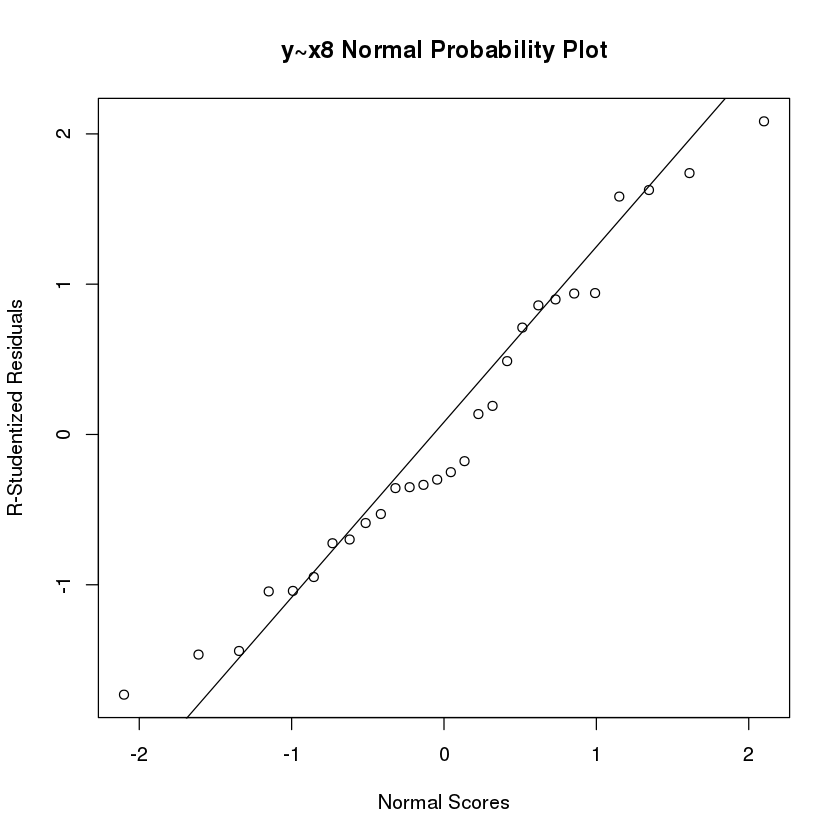

In [9]:
library(MASS)
model <- lm(y ~ x8, data=A)
residuals <- studres(model)
qqnorm(residuals, ylab="R-Studentized Residuals", xlab="Normal Scores", main="y~x8 Normal Probability Plot") 
qqline(residuals) 

By the "fat pencil" test, there do not appear to be significant deviations from normality.  There is some indication of being "light-tailed" if you use a particularly thin pencil, but the rule of thumb is a "fat pencil".

b)  Construct and interpret a plot of the residuals versus the predicted response.


[1] -0.008222328

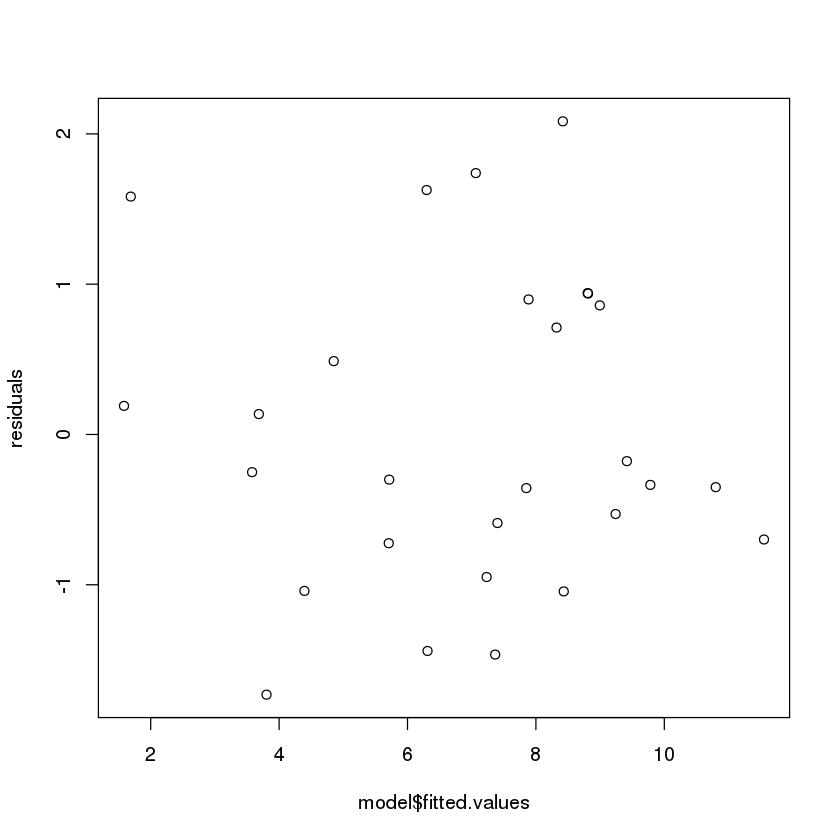

In [18]:
plot(residuals~model$fitted.values)
cor(residuals,model$fitted.values)

There appears to be no correlation between the fitted values and the residuals.  If a correlation were present, that would imply that there is additional variability in the model that could be explained by the regressor.  We could then proceed to evaluate some non-linear term of the regressor or an interaction term in an attempt to explain this additional variability.

c)  Plot the residuals versus the team passing yardage, x<sub>2</sub>.   Does this plot indicate that the model will be improved by adding x<sub>2</sub> to the model?

Repeat for x<sub>7</sub>.

[1] 0.6646075

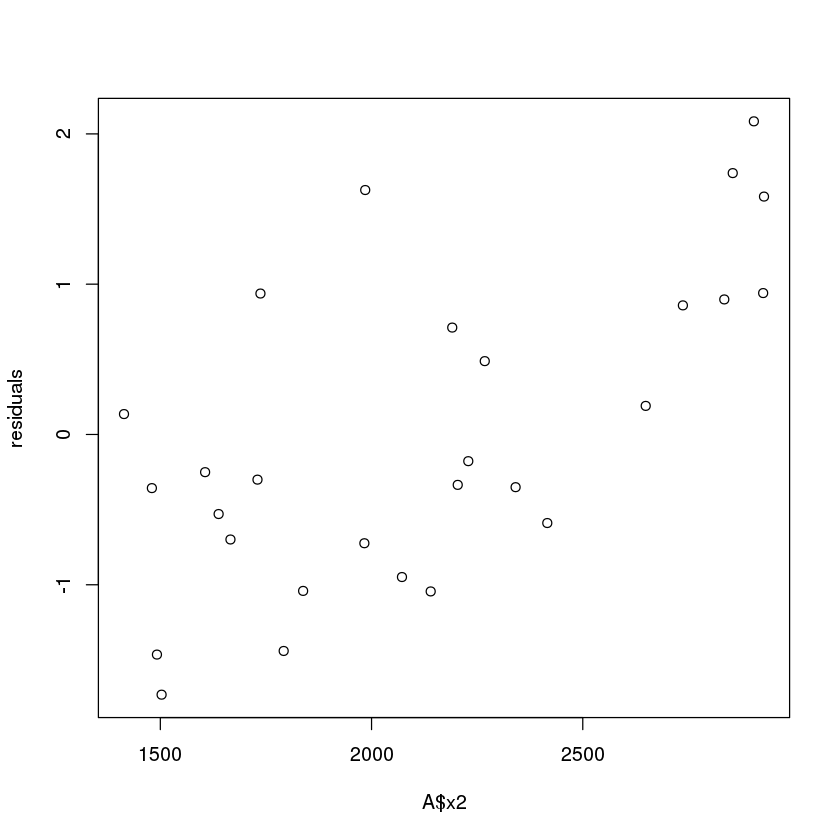

[1] 0.05360559

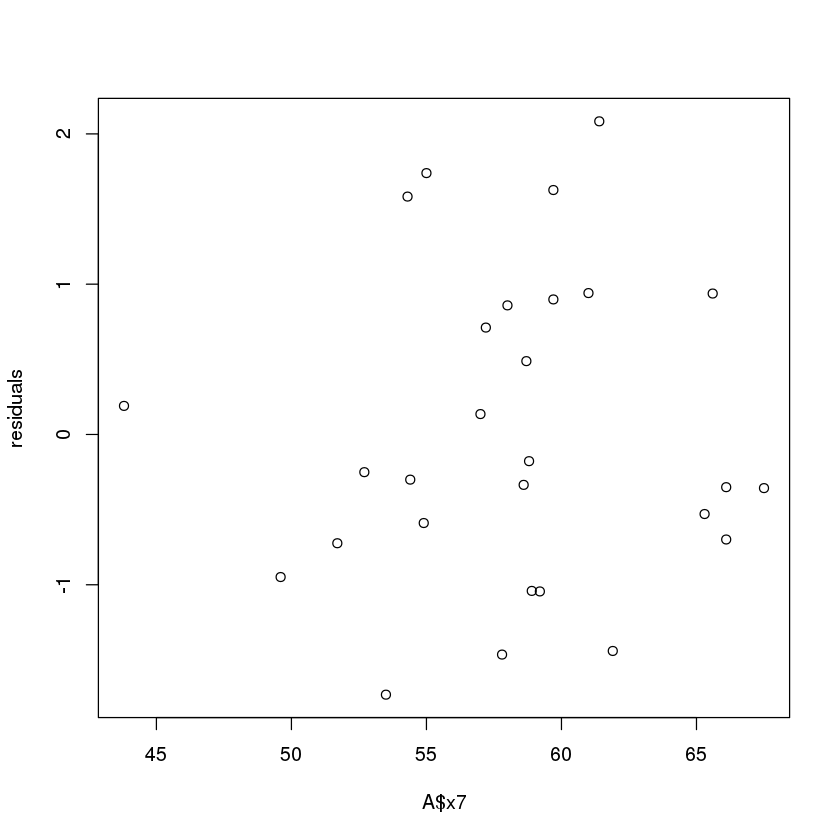

In [22]:
plot(residuals~A$x2)
cor(residuals,A$x2)

plot(residuals~A$x7)
cor(residuals,A$x7)


Since x<sub>2</sub> appears to have a correlation with the model residuals, there is additional variability in the model that can be explained by adding x<sub>2</sub> as a regressor. 

x<sub>7</sub> has a slight correlation, but is practically zero.  In this case, the addition of x<sub>7</sub> would likely not contribute much towards explaining the variance in our model.  I would prefer to add x<sub>2</sub> before adding x<sub>7</sub> since x<sub>2</sub> has a greater correlation.  The addition of x<sub>2</sub>  to the model would also be predicated on the juxtaposition of the parsimony of the expanded model to its marginal ability to explain variance.  This juxtaposition can be evaluated by contrasting the adjusted R<sup>2</sup>  of the expanded model and the adjusted R<sup>2</sup> of the current model.

In [23]:
cor(A$x2, A$x7)

[1] -0.1969154